In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import shutil

import statsmodels.api as sm
from scipy import interpolate

In [3]:
reg=['604','595']
inst=['I','T']
lin=['H','N','O','S']
sam=['A','B','C']
ms=['H','V']

In [4]:
n=7
pc=4.16
tl="24"

In [5]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

In [6]:
rg='604\\'
r=0
i=0
l=2
s=2
m=0

datat=reg[r]+inst[i]+lin[l]+sam[s]+ms[m]
datat

'604IOCH'

In [7]:
#xx

In [8]:
#folder=reg[r]+'//'+inst[i]+'//'+lin[l]+'//'+sam[s]+'//'+ms[m]
#folder

In [9]:
os.mkdir(rg+datat)

Structure Function

In [10]:
xi=1
xf=11

In [11]:
pickle_in = open('Datos\\'+datat+'//'+'S.pkl',"rb")
SF = pickle.load(pickle_in)
datax=SF

In [12]:
SFData=dict()
SFD=dict()



for i in range(n):
    al=np.log10(datax[i].Lag)
    bl=np.log10(datax[i].Nmqvd)
    cl=np.log10(datax[i].ErrY)
    x,y,z=np.array(al[xi:xf]),np.array(bl[xi:xf]),np.array(cl[xi:xf])
    x = sm.add_constant(x)
    #model = sm.OLS(y, x)
    model = sm.WLS(y, x,weights=1./(z**2))
    SFData[i] = model.fit()
    SFD[i]=[SFData[i].params[1],SFData[i].bse[1],SFData[i].params[0],SFData[i].bse[0],
         SFData[i].rsquared,datax[i].Lag[xi],datax[i].Lag[xf]]
    #SFD[i]=pd.DataFrame(XX).T

SFD=pd.DataFrame(SFD).T
SFD.rename(columns={0:'A',1:'DA',2:'B',3:'DB',4:'C',5:'E',6:'F'}, inplace=True)
SFD.loc['Promedio'] = SFD.mean()
SFD

,A,DA,B,DB,C,E,F
0,0.607811,0.030294,1.582537,0.028812,0.980514,3.0,17.964419
1,0.595958,0.031510,1.584868,0.030049,0.978125,3.0,17.964419
2,0.400819,0.024686,1.693914,0.024127,0.970547,3.0,17.964419
3,0.398147,0.024412,1.695410,0.023861,0.970803,3.0,17.964419
4,0.365143,0.021736,1.712460,0.021335,0.972433,3.0,17.964419
5,0.360656,0.020582,1.713082,0.020226,0.974607,3.0,17.964419
6,0.352500,0.018806,1.701656,0.018527,0.977736,3.0,17.964419
Promedio,0.440148,0.024575,1.669133,0.023848,0.974966,3.0,17.964419


In [13]:
SFD=SFD.round(decimals=3)
SFDx=(SFD.groupby(SFD.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFres=SFDx[['A','B','C']].copy()

In [14]:
SFres=SFres.assign(D=SFD.E*pc)
SFres=SFres.assign(E=SFD.F*pc)

In [15]:
SFres.rename(columns={'A':'$\\alpha$','B':'$\epsilon$','C':'R','D':'L$_{0}$ [pc]','E':'L$_{F}$ [pc]'}, inplace=True)

In [16]:
SFres=SFres.round(decimals=3)
SFres

,$\alpha$,$\epsilon$,R,L$_{0}$ [pc],L$_{F}$ [pc]
0,0.608$\pm$0.03,1.583$\pm$0.029,0.981,12.48,74.73
1,0.596$\pm$0.032,1.585$\pm$0.03,0.978,12.48,74.73
2,0.401$\pm$0.025,1.694$\pm$0.024,0.971,12.48,74.73
3,0.398$\pm$0.024,1.695$\pm$0.024,0.971,12.48,74.73
4,0.365$\pm$0.022,1.712$\pm$0.021,0.972,12.48,74.73
5,0.361$\pm$0.021,1.713$\pm$0.02,0.975,12.48,74.73
6,0.352$\pm$0.019,1.702$\pm$0.019,0.978,12.48,74.73
Promedio,0.44$\pm$0.025,1.669$\pm$0.024,0.975,12.48,74.73


In [17]:
SFres.to_latex(rg+datat+'//'+'a.tex', escape=False, caption=datat+'a')

In [18]:
SFdisc = SFD[['A','DA']].copy()

In [19]:
exp1=2/3
SFdisc=SFdisc.assign(B=((SFD.A-exp1)/exp1)*100)

exp2=5/3
SFdisc=SFdisc.assign(C=((SFD.A-exp2)/exp2)*100)

In [20]:
#SFdisc

In [21]:
#print(SFData[0].summary())

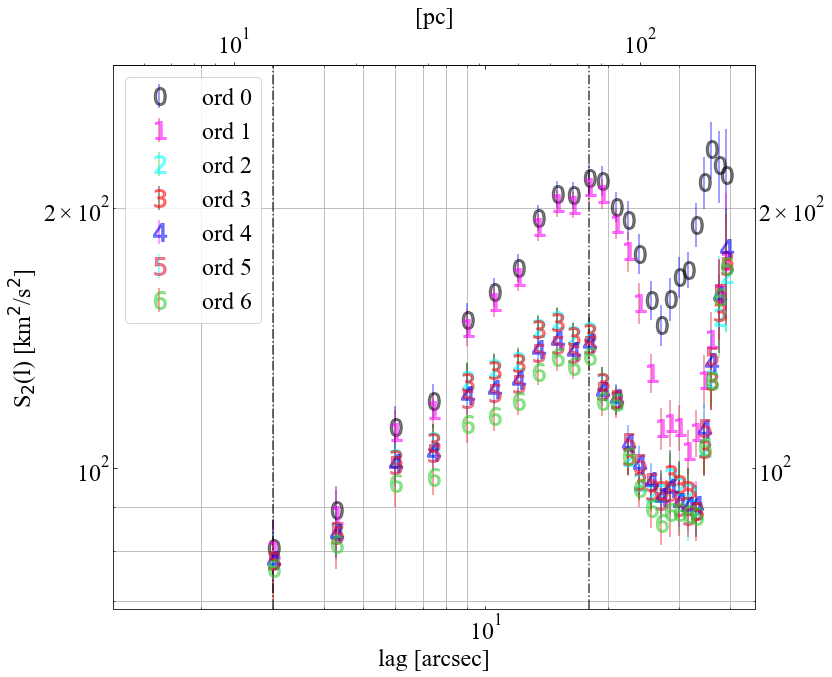

In [22]:

#dt=SFPr

yi=xi
yf=xf

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

#marker=itertools.cycle(('o','^','s','h','*','p','v'))
#color=itertools.cycle(('b','y','r','c','m','k','g'))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.85

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=18, label='ord ' + str(i))
    
#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl
fig.savefig(rg+datat+'//'+'S.pdf')

Structure Function Norm

In [23]:
pickle_in = open('Datos\\'+datat+'//'+'SN.pkl',"rb")
SFN = pickle.load(pickle_in)
datax=SFN

In [24]:
SFNData=dict()


for i in range(n):
    x=SFN[i]['Lag']*pc
    y=SFN[i]['Nmqvd']-2
    tck=interpolate.splrep(x,y,s=0)
    grid=np.linspace(x.min(),x.max(),num=len(x))
    ynew=interpolate.splev(grid,tck,der=0)

    inter=pd.DataFrame([grid,ynew]).T
    SFNData[i]=interpolate.sproot(tck)

In [25]:
SFND=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in SFNData.items() ])).T
SFND.rename(columns={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'10'}, inplace=True)
SFND=SFND.round(decimals=0)

SFND

,1,2,3
0,50.0,101.0,132.0
1,46.0,99.0,156.0
2,35.0,88.0,147.0
3,35.0,88.0,148.0
4,35.0,90.0,145.0
5,35.0,90.0,144.0
6,37.0,91.0,145.0


https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths

In [26]:
SFND.to_latex(rg+datat+'//'+'b.tex', escape=False, caption=datat+'b')

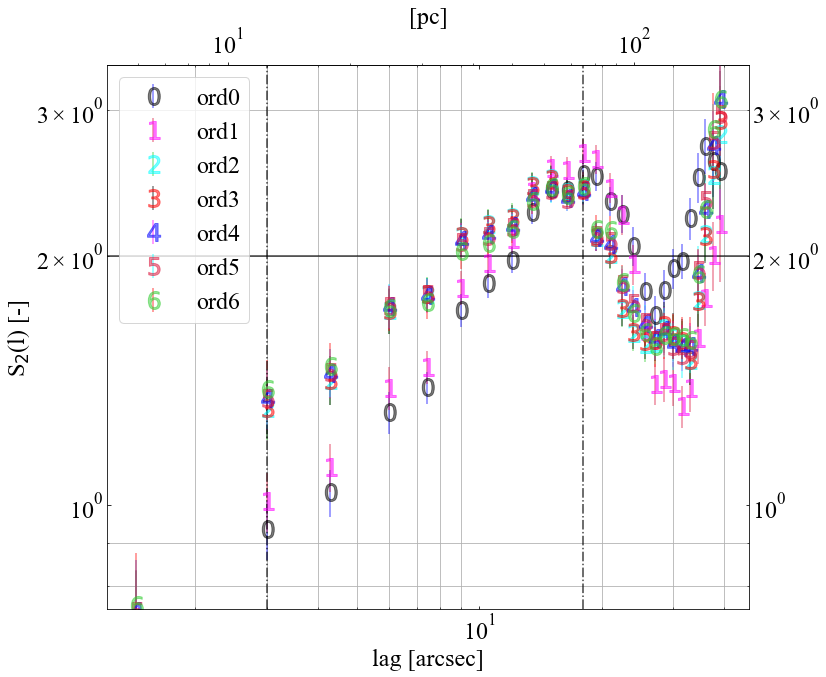

In [27]:
#dt=SFNPr

yi=xi
yf=xf

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.8

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=18, label='ord' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)
plt.axhline(y=2, color='k', linestyle='-', alpha=0.75)


def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

fig.savefig(rg+datat+'//'+'SN.pdf')

Structure Function WH

In [28]:
xi=0
xf=4

In [29]:
pickle_in = open('Datos\\'+datat+'//'+'SH.pkl',"rb")
SFH = pickle.load(pickle_in)
datax=SFH

In [30]:
SFHData=dict()
SFHD=dict()

for i in range(n):
    al=np.log10(datax[i].Lag)
    bl=np.log10(datax[i].Nmqvd)
    cl=np.log10(datax[i].ErrY)
    x,y,z=np.array(al[xi:xf]),np.array(bl[xi:xf]),np.array(cl[xi:xf])
    x = sm.add_constant(x)
    #model = sm.OLS(y, x)
    model = sm.WLS(y, x,weights=1./(z**2))
    SFHData[i] = model.fit()
    SFHD[i]=[SFHData[i].params[1],SFHData[i].bse[1],SFHData[i].params[0],SFHData[i].bse[0],
         SFHData[i].rsquared,datax[i].Lag[xi],datax[i].Lag[xf]]
    #SFD[i]=pd.DataFrame(XX).T

SFHD=pd.DataFrame(SFHD).T
SFHD.rename(columns={0:'A',1:'DA',2:'B',3:'DB',4:'C',5:'E',6:'F'}, inplace=True)
SFHD.loc['Promedio'] = SFHD.mean()
SFHD

,A,DA,B,DB,C,E,F
0,0.576908,0.032730,1.604747,0.029922,0.993604,4.667212,14.755395
1,0.534009,0.031868,1.618464,0.029206,0.992928,4.667212,14.755395
2,0.435912,0.007713,1.672426,0.007144,0.999374,4.667212,14.755395
3,0.425594,0.006209,1.678136,0.005753,0.999574,4.667212,14.755395
4,0.373574,0.006229,1.712661,0.005795,0.999444,4.667212,14.755395
5,0.348333,0.008117,1.730043,0.007568,0.998915,4.667212,14.755395
6,0.319993,0.015451,1.739846,0.014454,0.995359,4.667212,14.755395
Promedio,0.430618,0.015474,1.679475,0.014263,0.997028,4.667212,14.755395


In [31]:
SFdisc=SFdisc.assign(D=((SFHD.A-SFD.A)/SFD.A)*100)
SFdisc.loc['Promedio'] = SFdisc.mean()

In [32]:
SFdisc

,A,DA,B,C,D
0,0.608000,0.03000,-8.80000,-63.5200,-5.113777
1,0.596000,0.03200,-10.60000,-64.2400,-10.401111
2,0.401000,0.02500,-39.85000,-75.9400,8.706146
3,0.398000,0.02400,-40.30000,-76.1200,6.933104
4,0.365000,0.02200,-45.25000,-78.1000,2.349082
5,0.361000,0.02100,-45.85000,-78.3400,-3.508825
6,0.352000,0.01900,-47.20000,-78.8800,-9.092876
Promedio,0.440125,0.02475,-33.98125,-73.5925,-1.532577


In [33]:
SFdisc=SFdisc.round(decimals=3)
SFdiscx=(SFdisc.groupby(SFdisc.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFdis=SFdiscx[['A','B','C','D']].copy()
SFdis.rename(columns={'A':'$\\alpha$','B':'2/3','C':'5/3','D':'SF$_{WH}$'}, inplace=True)

In [34]:
SFdis

,$\alpha$,2/3,5/3,SF$_{WH}$
0,0.608$\pm$0.03,-8.8,-63.52,-5.114
1,0.596$\pm$0.032,-10.6,-64.24,-10.401
2,0.401$\pm$0.025,-39.85,-75.94,8.706
3,0.398$\pm$0.024,-40.3,-76.12,6.933
4,0.365$\pm$0.022,-45.25,-78.1,2.349
5,0.361$\pm$0.021,-45.85,-78.34,-3.509
6,0.352$\pm$0.019,-47.2,-78.88,-9.093
Promedio,0.44$\pm$0.025,-33.981,-73.593,-1.533


In [35]:
SFdis.to_latex(rg+datat+'//'+'c.tex', escape=False, caption=datat+'c')

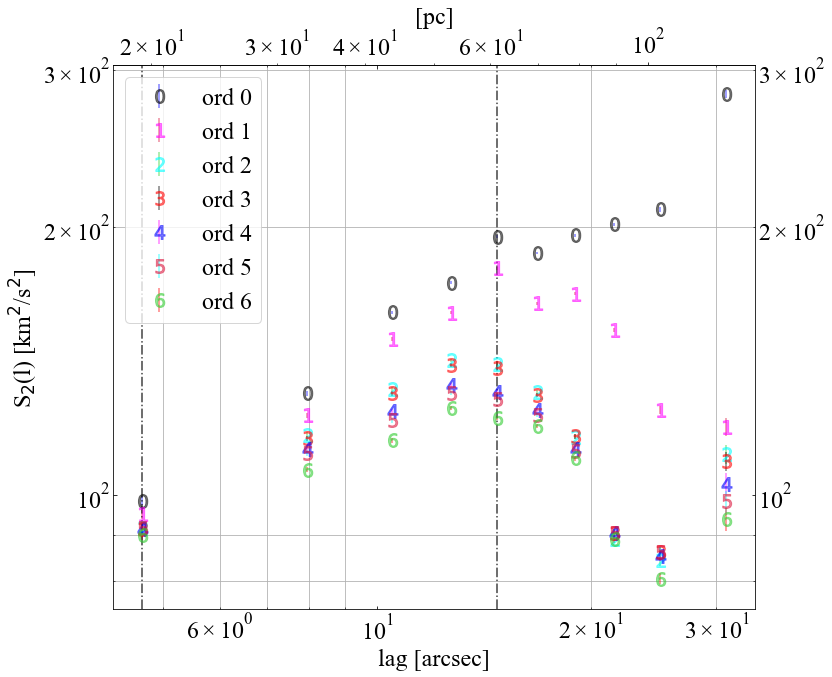

In [36]:
#dt=SFwh1Pr

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.6

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=14, label='ord ' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
#plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

fig.savefig(rg+datat+'//'+'SWH.pdf')

Auto correlation Function

In [37]:
pickle_in = open('Datos\\'+datat+'//'+'AF.pkl',"rb")
AF = pickle.load(pickle_in)

In [38]:
AFData=dict()

for i in range(n):
    x=AF[i]['Lag']*pc
    y=AF[i]['Nmqvd']
    tck=interpolate.splrep(x,y,s=0)
    grid=np.linspace(x.min(),x.max(),num=len(x))
    ynew=interpolate.splev(grid,tck,der=0)

    inter=pd.DataFrame([grid,ynew]).T
    AFData[i]=interpolate.sproot(tck)

In [39]:
AFD=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in AFData.items() ])).T
AFD.rename(columns={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'10'}, inplace=True)
AFD=AFD.round(decimals=0)
AFD

,1,2,3,4,5,6,7
0,54.0,133.0,133.0,149.0,NaN,NaN,NaN
1,53.0,111.0,NaN,NaN,NaN,NaN,NaN
2,49.0,79.0,85.0,89.0,105.0,133.0,140.0
3,49.0,79.0,85.0,89.0,105.0,133.0,140.0
4,51.0,79.0,85.0,93.0,100.0,130.0,140.0
5,51.0,79.0,84.0,93.0,99.0,128.0,139.0
6,51.0,80.0,82.0,93.0,105.0,133.0,139.0


In [40]:
AFD.to_latex(rg+datat+'//'+'d.tex', escape=False, caption=datat+'d')

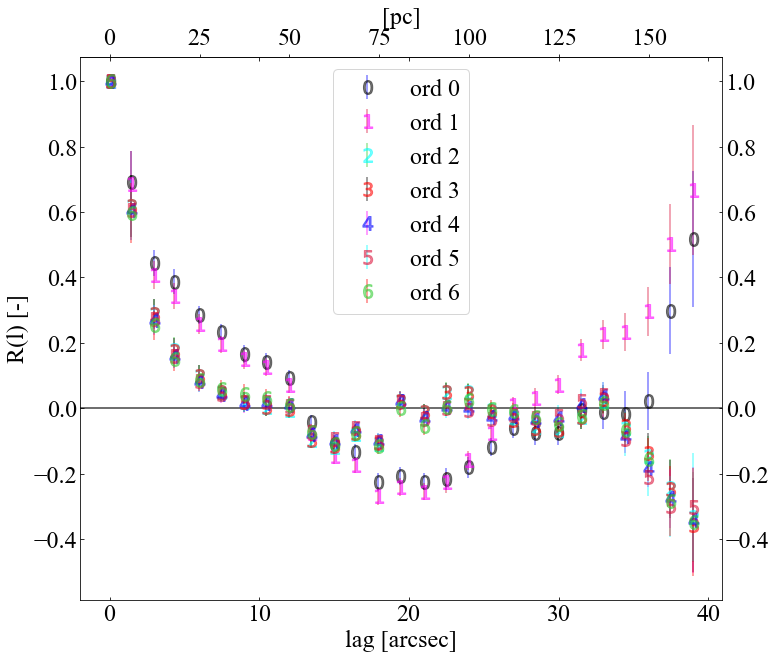

In [41]:
datax=AF
#dt=SFwh1Pr

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

#mx=datax[0].iloc[:,1].max()*1.25
#mn=datax[0].iloc[1,1]*0.6

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=14, label='ord ' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

#ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
#plt.ylim(mn,mx)
#########################################################
plt.axhline(y=0, color='k', linestyle='-', alpha=0.75)
#plt.axvline(x=datax[0].iloc[xf-1,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

plt.savefig(rg+datat+'//'+'AC.pdf')

In [42]:
#os.mkdir(rg+datat)

In [43]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 12.431050539016724 seconds ---
